# Aprendizaje basado en instancias

En esta sesión de trabajo con Jupyter aplicaremos los conceptos presentados en el módulo sobre aprendizaje basado en instancias al conjunto de datos Iris.

## Procesado de los datos

El conjunto de [datos Iris](https://es.wikipedia.org/wiki/Iris_flor_conjunto_de_datos) contiene datos sobre cuatro características morfológicas de tres especies de la flor Iris: Iris setosa, Iris virginica e Iris versicolor. En concreto hay 50 muestras de cada especie. Para cada una de ellas se tiene información sobre el largo y el ancho del pétalo y el sépalo, medidos en centímetros.

Lo primero que vamos a hacer es cargar el conjunto de datos Iris incluido en *Scikit-learn*, usando la función [`load_iris()`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) incluido en la librería `sklearn.datasets`

In [27]:
from sklearn.datasets import load_iris

iris = load_iris()

Este conjunto de datos es un diccionario con varios campos:
* `data`: Es el conjunto de datos, se trata de un array en el que cada componente es un array con las características de cada instancia.
* `target`: Es el conjunto de valores de clasificación para cada instancia. Es un array del mismo tamaño que `data`, en el que se indica el valor de clasificación de cada instancia, en el mismo orden en que éstas se encuentran en el array `data`.
* `target_names`: Es un array con los nombres de cada valor de clasificación.
* `feature_names`: Es un array con los nombres de cada característica.
* `DESCR`: Es una descripción del conjunto de datos.


El valor `i`-ésimo del array de datos y su valor de clasificación se pueden obtener con la siguiente función:

In [28]:
def datoIesimo(i):
    print("Dato (",i,"): ",iris['data'][i])
    print("  Clasificación: ",iris['target'][i])
    
datoIesimo(10)    

Dato ( 10 ):  [5.4 3.7 1.5 0.2]
  Clasificación:  0


Los valores de clasificación almacenados en el array `target` son valores numéricos contados desde 0 en adelante y se corresponden con la clasificación almacenada en el array `target_names`. Es decir el valor de clasificación `j` se corresponde con la clasificación `target_names[j]`. Teniendo esto en cuenta podemos mejorar la función anterior para proporcionar esta información:

In [29]:
def datoIesimo(i):
    print("Dato (",i,"): ",iris['data'][i])
    print("  Clasificación: ",iris['target_names'][iris['target'][i]])

datoIesimo(10)    

Dato ( 10 ):  [5.4 3.7 1.5 0.2]
  Clasificación:  setosa


De la misma forma, los valores que contiene cada dato se corresponden con los valores de las características, en el mismo orden en que aparecen en el array `feature_names`. Finalmente, la función anterior se puede mejorar asociando cada valor del dato con la característica correspondiente:

In [30]:
def datoIesimo(i):
    print("Características del dato número ",i,":")
    for j in range(4):
        print(" ",iris['feature_names'][j],": ",iris['data'][i][j])
    print("  Clasificación: ",iris['target_names'][iris['target'][i]])
    
datoIesimo(10)    

Características del dato número  10 :
  sepal length (cm) :  5.4
  sepal width (cm) :  3.7
  petal length (cm) :  1.5
  petal width (cm) :  0.2
  Clasificación:  setosa


El último valor devuelto por la función `load_iris()` es una descripción del conjunto de datos.

In [31]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Almacenamos cada uno de los campos que resultan de interés para este ejercicio en variables distintas.

In [32]:
X_data, y_data, X_names, y_names = \
    iris.data, iris.target, iris.feature_names, iris.target_names

Podemos visualizar el conjunto de datos usando la librería `matplotlib`. Para esto, consideramos un par de características 
(por ejemplo las dos primeras) y presentamos en un gráfico 2D un conjunto de puntos que representan cada uno de los ejemplos del conjunto de datos. Para diferenciar los valores de clasificación usamos distintas formas y colores para cada uno de ellos: cuadrados rojos para el primer valor de clasificación (Iris setosa), círculos verdes para el segundo valor de clasificación (Iris versicolor) y rombos azules para el tercer valor de clasificación (Iris virgínica).

Cargamos la librería [`pyplot`](https://matplotlib.org/api/pyplot_api.html) de la biblioteca `matplotlib` con el nombre `plt`:

In [33]:
from matplotlib import pyplot as plt

El proceso para dibujar los datos consiste en limpiar el lienzo (`plt.clf()`) y para cada terna formada por el valor de clasificación (`range(len(y_names))`), la forma (`"soD"`) y el color (`"rgb"`) deseados, recoger en las variables `xs` e `ys` los valores de las características a representar de todos los datos con el valor de clasificación considerado. Estos puntos se representan con el método (`plt.scatter`) con la forma y el color considerados. Finalmente etiquetamos los ejes horizontal y vertical con los nombres de las características representadas.

El siguiente trozo de código sirve para visualizar como se distribuyen los datos con respecto a los valores de las características longitud de sépalo y anchura de sépalo:

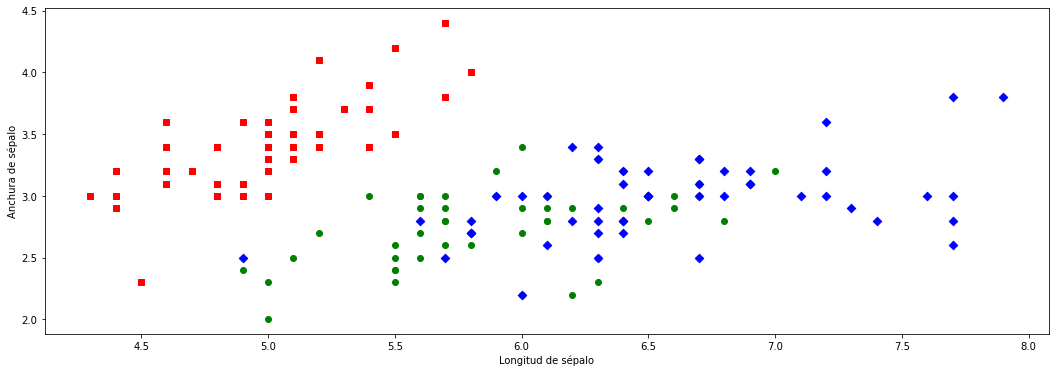

In [34]:
plt.clf()
for tipo,marca,color in zip(range(len(y_names)),"soD","rgb"):
    xs=X_data[y_data==tipo,0]
    ys=X_data[y_data==tipo,1]
    plt.scatter(xs,ys,marker=marca,c=color)
plt.xlabel("Longitud de sépalo")
plt.ylabel("Anchura de sépalo")
plt.show()

En este gráfico se puede observar que los datos de las flores de la variedad setosa se pueden separar fácilmente de los otros, que se mezclan un poco. 

Este proceso se puede definir como el efecto de una función:

In [35]:
def representacion_grafica(datos,caracteristicas,objetivo,clases,c1,c2):
    for tipo,marca,color in zip(range(len(clases)),"soD","rgb"):
        xs = datos[objetivo == tipo,c1]
        ys = datos[objetivo == tipo,c2]
        plt.scatter(xs,ys,marker=marca,c=color)
    plt.xlabel(caracteristicas[c1])
    plt.ylabel(caracteristicas[c2])

Podemos utilizar esta función para representar gráficamente la distribución de los datos con respecto a cada pareja de características. Eso se consigue dividiendo el lienzo en seis trozos, en 2 filas y 3 columnas con las correspondientes llamadas al método `plt.subplot`:

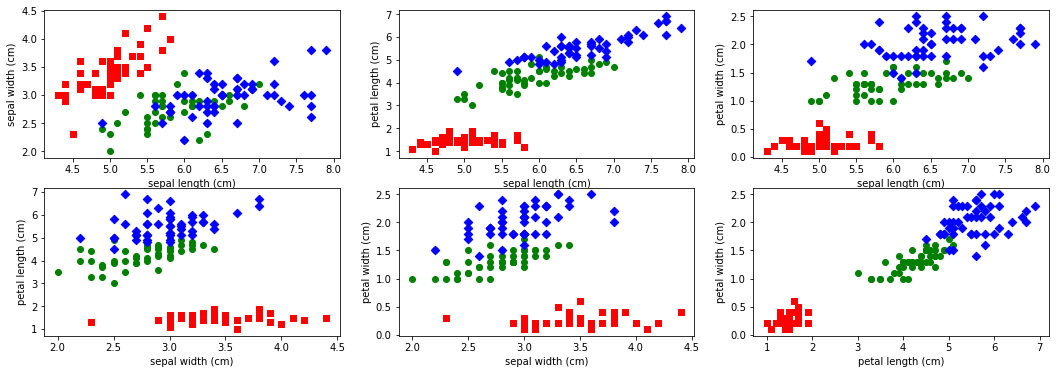

In [36]:
def representacion_conjunta():
    plt.clf()
    plt.rcParams["figure.figsize"] = [18,12]
    plt.subplot(231)
    representacion_grafica(X_data,X_names,y_data,y_names,0,1)
    plt.subplot(232)
    representacion_grafica(X_data,X_names,y_data,y_names,0,2)
    plt.subplot(233)
    representacion_grafica(X_data,X_names,y_data,y_names,0,3)
    plt.subplot(234)
    representacion_grafica(X_data,X_names,y_data,y_names,1,2)
    plt.subplot(235)
    representacion_grafica(X_data,X_names,y_data,y_names,1,3)
    plt.subplot(236)
    representacion_grafica(X_data,X_names,y_data,y_names,2,3)
    plt.subplots_adjust(wspace=0.2,hspace=0.2)
    plt.show()

representacion_conjunta()

De los gráficos anteriores se puede deducir que las características que mejor separan los datos (y por tanto las que mejor sirven para clasificarlos) son la longitud y anchura del pétalo. 

## Aprendizaje basado en instancias: Algoritmo k-NN

Vamos a aplicar el algoritmo k-NN al conjunto de datos Iris para clasificar nuevas instancias. Para que esto tenga sentido, tendremos que dividir el conjunto de datos original en dos trozos: un conjunto de entrenamiento para el aprendizaje y un conjunto de prueba para la evaluación. Esto lo conseguimos con la función `train_test_split` de la librería `sklearn.model_selection`.

In [37]:
from sklearn.model_selection import train_test_split

Para usar esta función debemos proporcionar el array de datos original `X_data`, el array de valores de clasificación `y_data`, el tamaño de uno de los conjuntos resultado, `test_size` o `train_size`, que puede ser un valor entero indicado un valor absoluto del número de ejemplos o un número real entre 0 y 1, que representa un porcentaje del conjnto de datos original. Esta función realiza una selección aleatoria de índices en el rango de los arrays `X_data` e `y_data`, respetando la proporción indicada. Una vez hecho esto, devuelve los arrays de datos resultado de seleccionar en `X_data` e `y_data` los valores asociados a dichos índices, y los restantes. El parámetro `stratify` sirve para indicar con respecto a qué valores se quieren estratificar los datos (normalmente el valor de clasificación).

In [42]:
X_train, X_test, y_train, y_test = \
  train_test_split(X_data,y_data,test_size = 0.33,
                   random_state=4861,stratify=y_data)

Podemos ver gráficamente cómo se han distribuido los datos en los conjuntos de entrenamiento y prueba, representando simultáneamente estos conjuntos de datos junto con el conjunto de datos original.

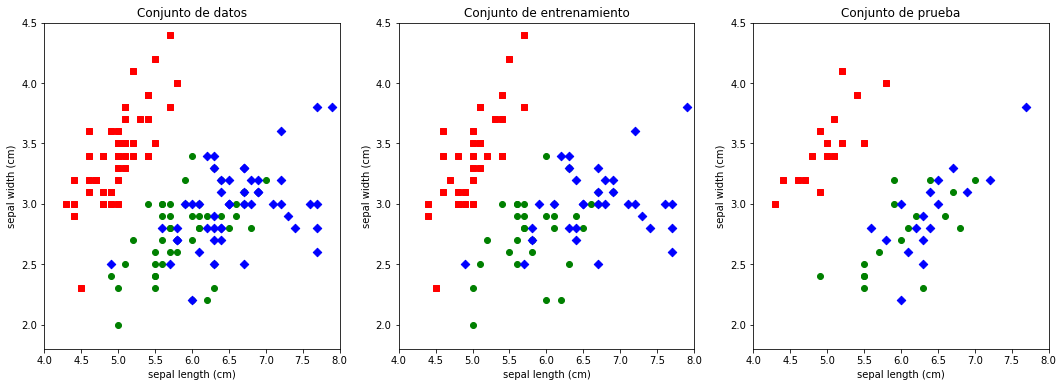

In [50]:
plt.rcParams["figure.figsize"] = [18,6]
plt.clf()
splt = plt.subplot(131)
splt.set_xlim(4,8)
splt.set_ylim(1.8,4.5)
splt.set_title("Conjunto de datos")
representacion_grafica(X_data,X_names,y_data,y_names,0,1)
splt = plt.subplot(132)
splt.set_xlim(4,8)
splt.set_ylim(1.8,4.5)
splt.set_title("Conjunto de entrenamiento")
representacion_grafica(X_train,X_names,y_train,y_names,0,1)
splt = plt.subplot(133)
splt.set_xlim(4,8)
splt.set_ylim(1.8,4.5)
splt.set_title("Conjunto de prueba")
representacion_grafica(X_test,X_names,y_test,y_names,0,1)
plt.show()

El algoritmo de clasificación **k**-*NN* se encuentra en la librería `sklearn.neighbors` implementado mediante la clase `KNeighborsClassifier`.

In [44]:
from sklearn.neighbors import KNeighborsClassifier

Creamos una instancia de este algoritmo con un valor de **k** igual a 5, este valor se indica con el parámetro `n_neighbors`. Para indicar la distancia a utilizar usamos el paramétro `p`, que será el valor del que dependerá la distancia Minkowski:
$$d_p(\textbf{x},\textbf{y})=(\sum_{i=1}^n(x_i-y_i)^p)^{1/p}$$

Como recordaréris, un valor de `p` igual a `1` se corresponde con el uso de la distancia Manhattan y un valor de `p` igual a `2` se corresponde con el uso de la distancia euclídea. También se puede usar otra distancia, prorcionándola como valor del parámetro `metric`.

In [45]:
knn1 = KNeighborsClassifier(n_neighbors=5,p=2)

Todos las implementaciones de algoritmos de aprendizaje en *Scikit-learn* admiten una serie de métodos con la misma funcionalidad:
* `fit`: Sirve para entrenar el modelo asociado, es decir aprender los parámetros que sirven para ajustarlo al conjunto de datos. Recibe como argumentos el array de características de los ejemplos y el de sus valores de clasificación.
* `predict`: Sirve para evaluar el modelo entrenado sobre un array de ejemplos. Recibe como argumento el array de características de los ejemplos y devuelve el array con sus valores de clasificación según el modelo.
* `score`: Mide el rendimiento del modelo entrenado sobre un array de ejemplos. Recibe como argumentos el array de características de los ejemplos y el de sus valores de clasificación. Devuelve el rendimiento del modelo sobre dicho conjunto de ejemplos.

Una vez creada la instancia del algoritmo de aprendizaje, hay que entrenarla con el conjunto de ejemplos de entrenamiento. En este caso, el entrenamiento sirve para organizar los datos de la mejor forma posible para calcular las distancias en las que se basa el proceso de clasificación.

In [46]:
knn1.fit(X_train,y_train)

KNeighborsClassifier()

Al entrenar el modelo, podemos ver los valores de los parámetros de los que depende el proceso de entrenamiento. Algunos de ellos (`algorithm`, `leaf_size` y `n_jobs`) son relativos al proceso de cálculo de las distancias necesarias para determinar los mejores vecinos, es decir, parámetros del algoritmo de entrenamiento; y otros (`metric`, `metric_params`, `n_neighbors`, `p` y `weights`) son relativos al proceso de selección de los mejores vecinos y de clasificación, es decir, parámetros del modelo de clasificación.

Veamos ahora el valor de clasificación de los ejemplos del conjunto de prueba.

In [47]:
knn1.predict(X_test)

array([1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2,
       2, 0, 1, 0, 2, 1])

Si comparamos este array con el de valores de clasificación del conjunto de prueba, `y_test`, podemos calcular el rendimiento del modelo.

In [24]:
y_test

array([1, 2, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 1,
       1, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2,
       2, 0, 1, 0, 2, 1])

In [26]:
y_clas = knn1.predict(X_test)
y_clas[y_clas != y_test]

array([2, 1])

In [28]:
y_test.shape

(50,)

In [29]:
48/50

0.96

Esto es precisamente lo que calcula el tercero de los métodos que hemos mencionado antes, `score`.

In [30]:
knn1.score(X_test,y_test)

0.96

Antes se ha visto otro parámetro, `weights`, del modelo de clasificación. Se trata de un forma de ponderar los valores de clasificación de los mejores vecinos. El valor por defecto es `uniform`, que indica que los valores de clasificación de los mejores vecinos se tratan de forma uniforme, sin dar más importancia a unos que a otros. El valor `distance` indica que se debe dar más importancia a los valores de clasificación de los mejores vecinos más cercanos. Esto puede afectar al resultado de la clasificación, haciendo variar el rendimiento.

Para usar este parámetro, tenemos que indicar su valor en el momento de crear la instancia del algoritmo de clasificación:

In [31]:
knn2 = KNeighborsClassifier(n_neighbors=5,p=2,weights='distance')

Entrenamos la nueva instancia con el mismo conjunto de ejemplos:

In [32]:
knn2.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

Y vamos a ver si hay algún cambio en el rendimiento del modelo obtenido

In [33]:
knn2.score(X_test,y_test)

0.98

Veamos ahora el efecto que produce cambiar la distancia. Vamos a construir una instancia del algoritmo de clasificación usando la distancia Manhattan. Para esto, solo hay que indicar el valor `1` para el parámetro `p`.

In [34]:
knn3 = KNeighborsClassifier(n_neighbors=5,p=1)

Entrenamos la instancia creada con el conjunto de entrenamiento

In [35]:
knn3.fit(X_train,y_train)

KNeighborsClassifier(p=1)

Y analizamos el rendimiento del modelo obtenido

In [36]:
knn3.score(X_test,y_test)

0.92

En este caso el resultado es peor que con la distancia euclídea. En este caso, dado que las características miden propiedades similares (longitudes) era de esperar que la distancia euclídea funcionase mejor que la Manhattan. Esta última resulta más útil cuando las características miden propiedades que no tienen nada en común.

## Normalización

El último factor que vamos a ver de los influyen en el modelo **k**-*NN* es la normalización. En este caso, las medidas de longitud de pétalos y sépalos tienen mayor rango que las medidas de anchura. Eso podría influir en las distancias entre los ejemplos. Para evitarlo, podemos normalizar los datos. *Scikit-learn* proporciona varias formas de normalizar un conjunto de datos. Aquí usamos la implementada en la clase `StandardScaler` de la librería `sklearn.preprocessing`:

In [37]:
from sklearn.preprocessing import StandardScaler

Al igual que los modelos de clasificación, el normalizador se 'entrena' con el conjunto de datos de entrenamiento, para determinar su media y su varianza. Esto se consigue con el método `fit`.

In [38]:
normalizador = StandardScaler().fit(X_train)

A partir de los valores aprendidos, se pueden modificar los datos originales de forma que el resultado quede con un valor de la media aproximadamente igual a 0 y un valor de la varianza aproximadamente igual a 1. Esto se consigue con el médodo `transform`:

In [39]:
Xn_train = normalizador.transform(X_train)
Xn_test = normalizador.transform(X_test)

Es muy importante que los ejemplos del conjunto de prueba se normalicen de la misma forma que los del conjunto de entrenamiento, para que el modelo aprendido funcione correctamente.

Los valores aprendidos por el normalizador se almacenan en los parámetros `mean_` para las medias de las características, `var_` para las varianzas y `scale_` para los factores multiplicativos que cambian la escala.

In [40]:
normalizador.mean_

array([5.852, 3.065, 3.779, 1.221])

In [41]:
normalizador.var_

array([0.730696, 0.181675, 3.218259, 0.608459])

In [42]:
normalizador.scale_

array([0.85480758, 0.4262335 , 1.79395067, 0.78003782])

In [43]:
from scipy import mean,var
print("Media de los datos originales: ",mean(X_train[:,0]))
print("Media de los datos normalizados: ",mean(Xn_train[:,0]))
print("Varianza de los datos originales: ",var(X_train[:,0]))
print("Varianza de los datos normalizados: ",var(Xn_train[:,0]))

Media de los datos originales:  5.851999999999999
Media de los datos normalizados:  6.794564910705958e-16
Varianza de los datos originales:  0.7306960000000001
Varianza de los datos normalizados:  1.0000000000000004


<ipython-input-43-8fd6cdba73e5>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  print("Media de los datos originales: ",mean(X_train[:,0]))
<ipython-input-43-8fd6cdba73e5>:3: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  print("Media de los datos normalizados: ",mean(Xn_train[:,0]))
<ipython-input-43-8fd6cdba73e5>:4: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  print("Varianza de los datos originales: ",var(X_train[:,0]))
<ipython-input-43-8fd6cdba73e5>:5: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
  print("Varianza de los datos normalizados: ",var(Xn_train[:,0]))


Podemos representar gráficamente los datos antes y después de la normalización para ver las diferencias

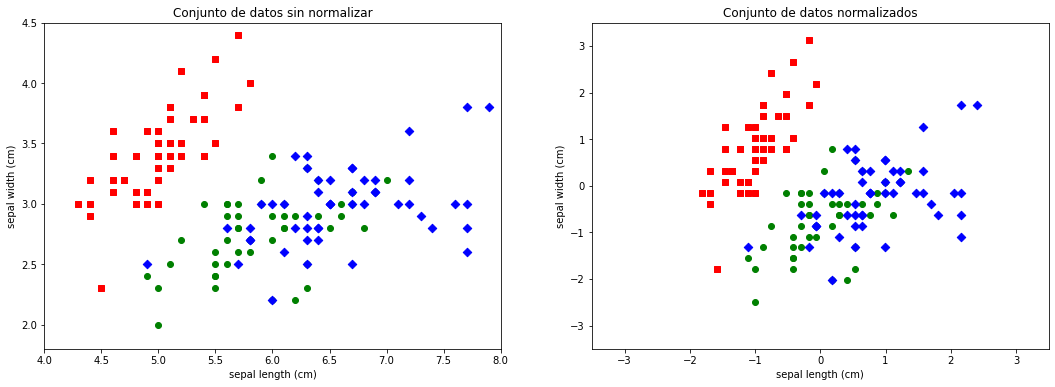

In [44]:
plt.rcParams["figure.figsize"] = [18,6]
plt.clf()
splt = plt.subplot(121)
splt.set_xlim(4,8)
splt.set_ylim(1.8,4.5)
splt.set_title("Conjunto de datos sin normalizar")
representacion_grafica(X_data,X_names,y_data,y_names,0,1)
splt = plt.subplot(122)
splt.set_xlim(-3.5,3.5)
splt.set_ylim(-3.5,3.5)
splt.set_title("Conjunto de datos normalizados")
Xn_data = normalizador.transform(X_data)
representacion_grafica(Xn_data,X_names,y_data,y_names,0,1)

Con estos nuevos datos, entrenamos una nueva instancia del algoritmo **k**-*NN*:

In [45]:
knn4 = KNeighborsClassifier(n_neighbors=5,p=2,weights='distance')
knn4.fit(Xn_train,y_train)
knn4.score(Xn_test,y_test)

0.98